# Homework 6

##### Data: HW6_data.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, October 20th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

** Place the name of everyone who's submitting this assignment here**

<div class="answer-separator">
------------------------
</div>

In [1]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline

## Question 1: Can I sample from F-R-I-E-N-D-S without rejection?  It's Important!

**Coding required**


*Haven't we made it obvious?* In HW 5 we were introduced to $X$ a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

*Haven't we made it clear?*  We were also introduced to $h$ the following function of $X$:

$$h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}$$


*Want us to spell it out for you?* Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:

**1.1.** Rejection sampling with a normal proposal distribution and appropriately chosen parameters (aka rejection on steroids)

**1.2.** Importance sampling with a uniform proposal distribution

**1.3.** Importance sampling with a normal proposal distribution and appropriately chosen parameters

--

**1.4.** So far (in HWs 5 and 6) we've computed estimates of $\mathbb{E}[h(X)]$ for the following list of methods:

* Inverse Transform Sampling
* Rejection Sampling with a uniform proposal distribution (rejection sampling in a rectangular box with uniform probability of sampling any x)
* Rejection sampling with a normal proposal distribution and appropriately chosen parameters (aka rejection on steroids)
* Importance sampling with a uniform proposal distribution
* Importance sampling with a normal proposal distribution and appropriately chosen parameters.

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ you calculated in this list. Which sampling methods and associated proposal distributions would you expect based on discussions from lecture to have resulted in lower variances? How well do your results align with these expectations?

**Gratuitous Titular Reference**:  Annemarie and Marshmello's [F-R-I-E-N-D-S](https://www.youtube.com/watch?v=CY8E6N5Nzec) samples from French Hip Hop artist Rapsa's [42 Mesures à ta Sa(i)nté](https://www.youtube.com/watch?v=JivaoPSAgLI) a homage to his hometown of Saint-Étienne.

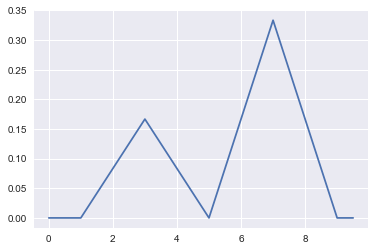

In [91]:
def f(x):
    y = np.zeros(np.shape(x))
    mask = np.logical_and(1 <= x, x <= 3)
    y[mask] = 1 / 12 * (x[mask] - 1)
    
    mask = np.logical_and(3 < x, x <= 5)
    y[mask] = - 1 / 12 * (x[mask] - 5)
    
    mask = np.logical_and(5 < x, x <=7)
    y[mask] = 1 / 6 * (x[mask] - 5)
    
    mask = np.logical_and(7 < x, x <=9)
    y[mask] = - 1 / 6 * (x[mask] - 9)
    
    return y
    
x = np.arange(0, 10, step=0.5)
y = f(x)
plt.plot(x, y)

In [92]:
def h(x):
    denom = 3 * np.sqrt(2) * np.pi
    exponent = -1 / 18 * (x - 5) ** 2
    return 1 / denom * np.exp(exponent)

Text(0,0.5,'Density')

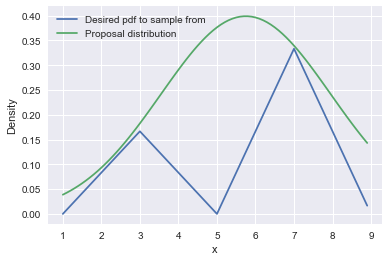

In [93]:
pdf = scipy.stats.norm.pdf(1.96, loc=1, scale=1)
mu = 5.75
sigma = 2.2
M = 2.2

x = np.arange(1, 9, 0.1)
plt.plot(x, f(x), label='Desired pdf to sample from')
plt.plot(x, M * scipy.stats.norm.pdf(x, loc=mu, scale=sigma), label='Proposal distribution')
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")

Text(0,0.5,'Density')

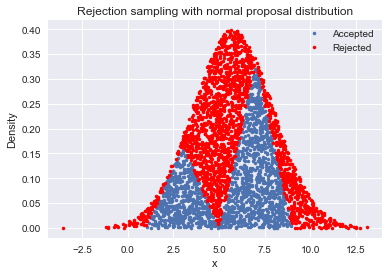

In [97]:
xmin = 1
xmax = 9
mu = 5.75
sigma = 2.2
M = 2.2
normal = scipy.stats.norm(loc=mu, scale=sigma)
n_drawn = int(1000 * (xmax - xmin) / M) # (xmax-xmin)/M is the probability of acceptance

x_prop = x_prop = np.random.normal(loc=mu, scale=sigma, size=n_drawn) 

acceptance_prob = f(x_prop)
x = x_prop[acceptance_prob > np.random.uniform(size=n_drawn)]
y_prop = np.random.uniform(0, 1, size=n_drawn) * normal.pdf(x_prop) * 2.2
col = (y_prop < f(x_prop))

plt.plot(x_prop[col], y_prop[col], '.', label='Accepted')
plt.plot(x_prop[np.logical_not(col)], y_prop[np.logical_not(col)], 'r.', label='Rejected')
plt.title('Rejection sampling with normal proposal distribution')
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")

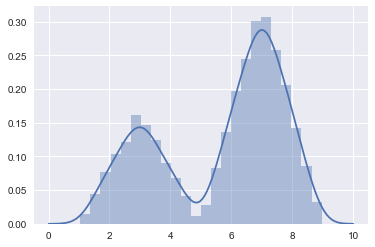

In [99]:
def sample_normal(n_samples=10000):
    xmin = 1
    xmax = 9
    mu = 5.75
    sigma = 2.2
    M = 2.2
    
    normal = scipy.stats.norm(loc=mu, scale=sigma)

    n_drawn = int(n_samples * M) # 1/M is the probability of acceptance

    x_prop = np.random.normal(loc=mu, scale=sigma, size=n_drawn) 
    y_prop = np.random.uniform(0, 1, size=n_drawn) * normal.pdf(x_prop) * M

    mask = (y_prop < f(x_prop))
    x = x_prop[mask]
    
    return x

sns.distplot(sample_normal(10000))

In [101]:
sample_normal(1000).shape

(1008,)

In [102]:
np.mean(h(sample_normal(10000)))

0.05880255764250688

<div class="answer-separator">
------------------------
</div>

## Question 2: Mr. Poe Writes of Gradient Descent Into the Maelström`

Suppose you are building a pricing model for laying down telecom cables over a geographical region. You construct a pricing model that takes as input a pair of coordinates, $(x_1, x_2)$ and based upon two parameters $\lambda_1, \lambda_2$ predicts the loss in revenue corresponding to laying the cables at the inputed location.  Your pricing model is described by the following equation:

$$
\mathcal{L}(x_1, x_2\ \vert\ \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x_1 + 0.003926\lambda_1 x_1\exp\left\{\left(x_2^2 - x_1^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

We've provided you some data contained in the file `HW6_data.csv`. This data represents a set of coordinates configured on the curve $x_2^2 - x_1^2 = -0.1$. Your general goal for this problem is to find the parameters $\lambda_1, \lambda_2$ that  minimize the net loss over the entire dataset.

**Gratuitous Titular Reference**:  The renowned American auteur Edgar Allen Poe penned ["A Descent into the Maelström"](https://en.wikipedia.org/wiki/A_Descent_into_the_Maelstr%C3%B6m), a macabre tale of a seemingly elderly man's surviving a previous horrendous encounter with a massive hurricane, a shipwreck and a sea vortex, in 1841.

> **2.1.** Construct an appropriate visualization of the loss function for the given data.  Use that visualization to verify that for $\lambda_1 = 2.05384, \lambda_2 = 0$, the loss function $L$ is minimized.  Your visualization should make note of this optima.

In [2]:
data = pd.read_csv("../data/HW6_data.csv")
data.head()

,X_1,X_2
0,17.218862,-17.215958
1,20.838999,20.836600
2,11.968430,11.964252
3,80.804795,80.804176
4,83.848662,83.848066


We rewrite the loss function:
$$
\mathcal{L}(x_1, x_2\ \vert\ \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x_1 + 0.003926\lambda_1 x_1\exp\left\{\left(x_2^2 - x_1^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

Note that all points are on the curve $x_1^2 - x_2^2 = 0.1$ and thus the loss function simplifies to

$$
\mathcal{L}(x_1, x_2\ \vert\ \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x_1 + 0.003926\lambda_1 x_1\exp\left\{0.1\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

for the datapoints given in `HW6_data.csv`.

Let's implement the function:

In [3]:
def L(x, lambdas):
    """
    Loss function for point(s) x and parameters lambdas
    
    :param x: np.array of shape (, 2)
    :param lambas: np.array of shape (2)
    """
    return np.sum(0.000045 * lambdas[1] ** 2 * x[:, 1] - 
                  0.000098 * lambdas[0] ** 2 * x[:, 0] + 
                  0.003926 * lambdas[0] * x[:, 0] * np.exp(-0.1 * (lambdas[0] ** 2 + lambdas[1] ** 2)))

In [4]:
lambda_1 = np.linspace(-10, 10, 200)
lambda_2 = np.linspace(-10, 10, 200)
L_grid = np.empty((lambda_1.shape[0], lambda_2.shape[0]))
for i, lambda1 in enumerate(lambda_1):
    for j, lambda2 in enumerate(lambda_2):
        L_grid[i, j] = L(data.values, np.array([lambda1, lambda2]))

Text(0.5,1,'The procalimed minimum really is a minimum')

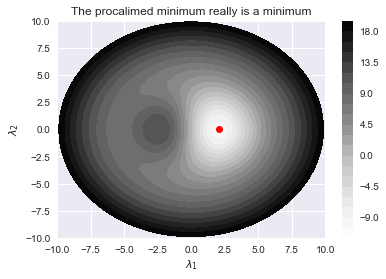

In [23]:
plt.plot([2.05385], [0], 'o', c='red')
levels = np.arange(-12, 20, 1.5)
plt.contourf(lambda_1, lambda_2, L_grid.transpose(), levels=levels)
plt.colorbar()
plt.xlabel(r"$\lambda_1$")
plt.ylabel(r"$\lambda_2$")
plt.title("The procalimed minimum really is a minimum")

The red dot in the figure above is the point $(2.05385, 0)$ and we see that it sits niecly in the minimum (brighter contour lines mean lower value of the loss function).

> **2.2.** Choose an appropriate learning rate  from [10, 1, 0.1, 0.01, 0.001, 0.0001] and use that learning rate to implement gradient descent.  Use your implementation to minimize $L$ for the given data.  Your implementation should be stored in a function named `gradient_descent`.  `gradient_descent` should take the following parameters (n represents the number of data points):

> - `lambda_init` -- a numpy array with shape (2 , 1) containing the initial value for $\lambda_1$ and $\lambda_2$
- `X_data` -- an numpy array with shape (n, 2) containing the data coordinates used in your loss function
- `step_size` -- a float containing the step-size/learning rate used in your algorithm
- `scale` -- a float containing the factor by which you'll scale your step_size (or alternatively your loss) in the algorithm
- `max_iterations` -- an integer containing a cap on the number of iterations for which you'll let your algorithm run
- `precision` -- a float containing the difference in loss between consecutive iterations below which you'll stop the algorithm
- `loss` -- a function (or lambda function) that takes in the following parameters and returns a float with the results of calculating the loss function for our data at $\lambda_1$ and $\lambda_2$
    - `lambdas` -- a numpy array with shape (2, 1) containing $\lambda_1$ and $\lambda_2$
    - `X_data` -- the same as the parameter `X_data` for `gradient_descent`
    
> The return value for `gradient_descent` should be a dictionary with the following keys (n_itertions represents the total number of iterations):
- 'lambdas' -- the associated value is a numpy array with shape (2,1) containing the optimal $\lambda$'s found by the algorithm
- 'history' -- the associated value is a numpy array with shape (n_iterations,) containing a history of the calculated value of the loss function at each iteration



We modify the above instructions a little bit to make the algorithm more general. We take as additional argument the **derivative of the loss function** and implement the whole gradient descent algorithm in `numpy`. We compute the derivative of the loss function analytically and implement in in `numpy` for the subsequent task.

$$
\mathcal{L}(x_1, x_2\ \vert\ \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x_1 + 0.003926\lambda_1 x_1\exp\left\{-0.1\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

$$
\frac{\partial \mathcal L}{\partial \lambda_1} = - 0.000098 \times 2 \times \lambda_1 x_1 + 0.003926 x_1 \exp\left\{-0.1\left(\lambda_1^2 + \lambda_2^2\right)\right\} - 0.003926 \lambda_1 x_1 \times 0.1 \times 2 \lambda_1 \exp\left\{-0.1\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

$$
\frac{\partial \mathcal L}{\partial \lambda_2} = 0.000045 \times 2 \times \lambda_2 x_2 - 0.003926 \lambda_1 x_1 \times 0.1 \times 2 \lambda_2 \exp\left\{-0.1\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

In [24]:
def loss_der(lambdas, X_data):
    """
    Derivative of loss function
    
    :param lambas: parameters of loss functio at which to calculate the derivative
    :param X_data: actual data
    """
    exponent = np.exp(-0.1 * (lambdas ** 2).sum())
    grad_lambda_1 = -0.000098 * 2 * lambdas[0] * X_data[:, 0] + 0.003926 * X_data[:, 0] * exponent - 0.003926 * lambdas[0] * X_data[:, 0] * 0.2 * lambdas[0] * exponent
    grad_lambda_2 = 0.00009 * lambdas[1] * X_data[:, 1] - 0.0003926 * lambdas[0]  * X_data[:, 0] * 2 * lambdas[1] * exponent
    return np.array([grad_lambda_1.sum(), grad_lambda_2.sum()])

Next, we turn to the implementation of the acutal gradient descent algorithm. It's pretty straightforward. We start with the intialization of all the parameters. Then we check whether we've exceeded the maximum number of ieterations or whether the change in loss is too small. If not, then we calculate the gradient, add it (multiplied by the step size) to the current value of `lambda` and then do a bit of bookkeeping.

In [27]:
def gradient_descent(loss, loss_der, X_data, lambda_init, step_size, scale, max_iterations, precision):
    """
    Gradient descent algorithm for loss function `loss`.
    
    :param loss: loss function taking as input `lambdas` and `X_data`
    :param loss_der: derivative of loss function taking as input `lamdas` and `X_data`
    :param X_data: numpy array, input data to loss functino
    :param step_size: float step size for gradient descent
    :param scale: rescaling factor after data has been passed through
    :param max_iterations: maximal number of iterations to be performed
    :param precision: float containing the difference in loss between consectuve iterations below which the algorithm will stop
    
    :return: dictionary with key 'lambdas' containing the optimal parameters and key 'history' containing the loss history
    """
    # Initialize all values
    n_iter = 0          # Number of iterations performed so far
    history = []        # Loss history
    loss_diff = np.inf
    lambdas = lambda_init
    
    while n_iter < max_iterations and np.abs(loss_diff) > precision:
        # Perform gradient descent step
        gradient = loss_der(lambdas, X_data)
        step_size *= scale
        lambdas -= gradient * step_size
        
        # Update stuff
        last_loss = loss(X_data, lambdas)
        history.append(last_loss)
        if n_iter > 1:
            loss_diff = history[-1] - history[-2]
        n_iter += 1
        
    return {'lambdas': lambdas, 'history': history}
    
    
    
    

> **2.3** For your implementation in 2.2, create a plot of loss vs iteration.  Does your descent algorithm comverge to the right values of $\lambda$?  At what point does your implementation converge?

We use as initial values the $(1.0, 1.0)$ and work with `step_size=0.1`.

In [28]:
grad_result = gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=0.1, scale=1.0, max_iterations=1000, precision=0.001)


Text(0,0.5,'Loss')

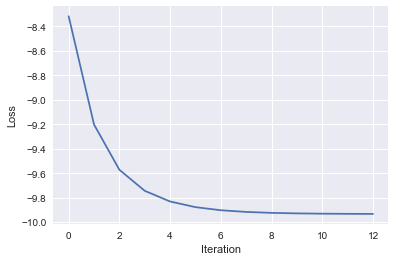

In [29]:
plt.plot(grad_result['history'])
plt.xlabel("Iteration")
plt.ylabel("Loss")

The plot of the loss function reveals that after around 12 iterations, we have reached convergence. The $\lambda$ parameters are close to the optimium mentioned in 2.1:

In [30]:
print("Results from gradient descent: {}".format(grad_result['lambdas']))

Results from gradient descent: [2.05364865 0.02649734]


> **2.4.** Choose an appropriate learning rate  from [10, 1, 0.1, 0.01, 0.001, 0.0001] and use that learning rate to implement stochastic gradient descent.  Use your implementation to minimize $L$ for the given data.  Your implementation should a stored in a function named `stochastic_gradient_descent`.  `stochastic_gradient_descent` should take the following parameters (n represents the number of data points):

> - `lambda_init` -- a numpy array with shape (2 , 1) containing the initial value for $\lambda_1$ and $\lambda_2$
- `X_data` -- an numpy array with shape (n, 2) containing the data coordinates for your loss function
- `step_size` -- a float containing the step-size/learning rate used in your algorithm
- `scale` -- a float containing the factor by which you'll scale your step_size (or alternatively your loss) in the algorithm
- `max_iterations` -- an integer containing a cap on the number of iterations for which you'll let your algorithm run
- `precision` -- a float containing the difference in loss between consecutive iterations below which you'll stop the algorithm
- `loss` -- a function (or lambda function) that takes in the following parameters and returns a float with the results of calculating the loss function for our data at $\lambda_1$ and $\lambda_2$
    - `lambdas` -- a numpy array with shape (2, 1) containing $\lambda_1$ and $\lambda_2$
    - `X_data` -- the same as the parameter `X_data` for `stochastic_gradient_descent`
    
> The return value for `stochastic_gradient_descent` should be a dictionary with the following keys (n_itertions represents the total number of iterations):
- 'lambdas' -- the associated value is a numpy array with shape (2,1) containing the optimal $\lambda$'s found by the algorithm
- 'history' -- the associated value is a numpy array with shape (n_iterations,) containing a history of the calculated value of the loss function at each iteration


In [31]:
def stochastic_gradient_descent(loss, loss_der, X_data, lambda_init, step_size, scale, max_iterations, precision):
    """
    Gradient descent algorithm for loss function `loss`.
    
    :param loss: loss function taking as input `lambdas` and `X_data`
    :param loss_der: derivative of loss function taking as input `lamdas` and `X_data`
    :param X_data: numpy array, input data to loss functino
    :param step_size: float step size for gradient descent
    :param scale: rescaling factor after data has been passed through
    :param max_iterations: maximal number of iterations to be performed (number of iterations over full dataset)
    :param precision: float containing the difference in loss between consectuve iterations below which the algorithm will stop
    
    :return: dictionary with key 'lambdas' containing the optimal parameters and key 'history' containing the loss history
    """
    # Initialize all values
    n_iter = 0          # Number of iterations performed so far
    history = []        # Loss history
    loss_diff = np.inf
    lambdas = lambda_init
    n = X_data.shape[0]
    
    while True:
        # Update step_size once per epoch
        step_size *= scale
        
        # Reshuffle data
        np.random.shuffle(X_data)
        
        last_lambdas = lambdas.copy()
        
        # Perform stochastic gradient descent step
        for example in X_data:
            # Check whether we exceeded maximum number of iterations
            n_iter += 1
            if n_iter >= max_iterations:
                print("Exceeded maximum number of iterations")
                return {'lambdas': lambdas, 'history': history}
            
            # Do update
            gradient = loss_der(lambdas, example.reshape(1, 2))
            lambdas -= gradient * step_size
            
            # Do bookkeeping
            if n_iter % 100 == 0:
                history.append(loss(X_data, lambdas))
                #print("Iteration: {}, loss: {}, lambdas: {}".format(n_iter, loss(X_data, lambdas), lambdas))
        
        last_loss = loss(X_data, last_lambdas)
        current_loss = loss(X_data, lambdas)
        if np.abs(current_loss - last_loss) < precision:
            return {'lambdas': lambdas, 'history': history}
        
        
    return {'lambdas': lambdas, 'history': history}
    
    
    
    

In [32]:
sgd_result = stochastic_gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=0.1, scale=1.0, max_iterations=1000000, precision=0.001)


> **2.5** For your implementation in 2.4, create a plot of loss vs iteration.  Does your descent algorithm comverge to the right values of $\lambda$?  At what point does your implementation converge?

Text(0,0.5,'Loss')

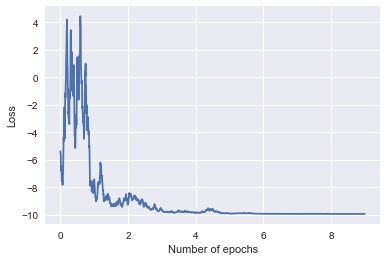

In [33]:
x = np.arange(0, len(sgd_result['history'])) * 100.0 / data.shape[0]
plt.plot(x, sgd_result['history'])
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

In [579]:
print("Values of lambda:", sgd_result['lambdas'])

Values of lambda: [2.05384112 0.01238622]


We see that the algorithm converges to the right $\lambda$ values after around 8 epochs.

> **2.6** Compare the average time it takes to update the parameter estimation in each iteration of the two implementations. Which method is faster? Briefly explain why this result should be expected.

We expect that the **stochastic gradient descent algorithm takes longer to complete an entire epoch** (i.e. pass over the full dataset), but that it is **faster for an inidividual parameter update** (corresponding to a single point in the dataset. Let's prove that:

In [34]:
%time stochastic_gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=0.1, scale=1.0, max_iterations=1000000, precision=0.001)

CPU times: user 7.11 s, sys: 53.1 ms, total: 7.16 s
Wall time: 7.29 s


{'history': [-6.861451607491235,
  -6.92675715909799,
  -6.404337323494909,
  -6.746466549185948,
  -6.868661202269392,
  -5.6146888650518685,
  -6.3440299244396225,
  -6.840249785721002,
  -6.967135611958942,
  -6.5052404768620935,
  -6.270905266843702,
  -6.556251823113534,
  -6.107450894620439,
  -6.876391730384105,
  -6.9387678226578196,
  -6.638815152459786,
  -5.606825479542085,
  -4.86945137650449,
  -3.750527748482261,
  -5.402307286353967,
  -5.598463552041332,
  -6.033539423286298,
  -6.330911635968565,
  -7.357683069951605,
  -7.307699491259369,
  -8.028090544170732,
  -8.101343865859862,
  -8.05617467079573,
  -7.953599477133342,
  -7.96245320092381,
  -7.683071887045876,
  -7.946705530895487,
  -8.153223134798703,
  -8.208618915699049,
  -8.008107251094685,
  -7.917089568246345,
  -7.926223039663752,
  -8.003823589888796,
  -7.966448109954336,
  -8.226924894266975,
  -7.6910747532531545,
  -7.198627216163173,
  -7.472523768829388,
  -8.013799842160964,
  -8.44675350199864,

So, stoachstic gradient descent takes 6.72 seconds for 128'000 iterations, i.e. 0.0525 milliseconds per iteration. It takes thus around 0.84 seconds per epoch.

In [35]:
%time gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=0.1, scale=1.0, max_iterations=1000, precision=0.001)


CPU times: user 8.45 ms, sys: 2.62 ms, total: 11.1 ms
Wall time: 9 ms


{'history': [-8.316119917935005,
  -9.201975977044704,
  -9.57216823551125,
  -9.744382558096982,
  -9.831578384242016,
  -9.877898890962022,
  -9.90309378500971,
  -9.916947104642446,
  -9.924600616782822,
  -9.928837498596975,
  -9.931184932541054,
  -9.932485948474568,
  -9.93320709570796],
 'lambdas': array([2.05364865, 0.02649734])}

Gradient descent takes 7.97 ms for 13 epochs. This is 0.61 ms per epoch. This is much faster on a per epoch basis. Of course, gradient descent only updates the parameters once per full pass over the data, it also updates the parameters every 0.61 ms.

> **2.7** Compare the number of iterations it takes for each algorithm to obtain an estimate accurate to `1e-3`.  You may wish to set a cap for maximum number of iterations.  Which method converges to the optimal point in fewer iterations?  Briefly explain why this result should be expected.

In [36]:
sgd_result = stochastic_gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=0.1, scale=1.0, max_iterations=1000000, precision=1e-3)

In [37]:
grad_result = gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=0.1, scale=1.0, max_iterations=1000, precision=1e-3)

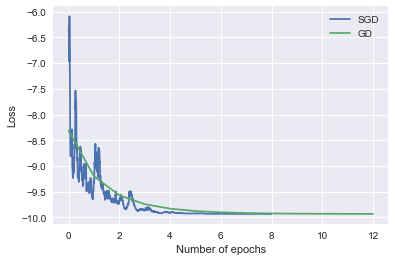

In [38]:
x = np.arange(0, len(sgd_result['history'])) * 100.0 / data.shape[0]
plt.plot(x, sgd_result['history'], label='SGD')
plt.plot(grad_result['history'], label='GD')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

SGD converges to the desired precision after 8 epochs, whereas gradient descent needs 12 epochs.

We see that stochastic gradient descent converges **faster** in terms of epochs, i.e. it needs to use each datapoint less frequently. Of course, in terms of raw parameter updates (which is the number of epochs times the size of the dataset), it needs many more.

This is to be expected since stochastic gradient descent updates the parameters more frequently. This can easily be seen in an extreme case. Consider the case where we have an extremely large dataset of examples that are very similar. Then stochastic gradient descent can finish in below one episode, whereas gradient descent always needs at least one episode.

> **2.8** Compare the performance of stochastic gradient descent on our loss function and dataset for the following learning rates: [10, 1, 0.1, 0.01, 0.001, 0.0001]. Based on your observations, briefly describe the effect of the choice of learning rate on the performance of the algorithm.

In [39]:
lrs = [10, 1, 0.1, 0.01, 0.001, 0.0001]
do_sgd = lambda lr: stochastic_gradient_descent(L, loss_der, X_data=data.values, lambda_init = np.array([1.0, 1.0]), step_size=lr, scale=1.0, max_iterations=16000*10, precision=1e-3)


In [40]:
sgd_results = [do_sgd(lr) for lr in lrs]

Exceeded maximum number of iterations
Exceeded maximum number of iterations
Exceeded maximum number of iterations


In [41]:
results = pd.DataFrame()
for i, lr in enumerate(lrs):
    foo = pd.DataFrame(pd.Series(sgd_results[i]['history']), columns=['loss'])
    foo['lr'] = lrs[i]
    foo['iteration'] = foo.index * 100
    results = results.append(foo)

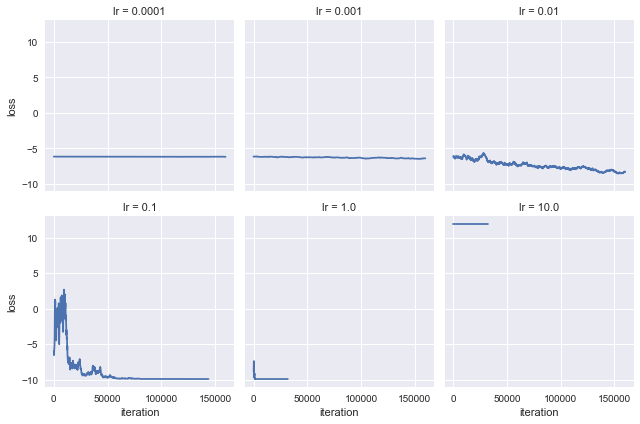

In [42]:
g = sns.FacetGrid(results, col="lr", col_wrap=3)
g.map(plt.plot, "iteration", "loss")

We see that for very small learning rates, the optimization is very slow and thus we don't converge to a solution in a reasonable time. For the large learning rate of 10, we don't obtain the correct solution (even though, strangely, it converges). 

So, neither for very small nor for very large learning rates, we have good performance.

> **2.9** Using your implementation of gradient descent and stochastic gradient descent, document the behavior of your two algorithms for the following starting points, and for a number of stepsizes of your choice:

>- $(\lambda_1, \lambda_2) = (-2.47865, 0)$
- $(\lambda_1, \lambda_2) = (-3, 0)$
- $(\lambda_1, \lambda_2) = (-5, 0)$
- $(\lambda_1, \lambda_2) = (-10, 0)$

>Construct a mathematical analysis of the loss function $\mathcal{L}$ to explain results of your descent algorithms at different starting points.

We try both gradient descent and stochastic gradient descent for several initializations of $\lambda$ and for several learning rates. The results are summarized in the table below.

In [46]:
lambdas_init = (np.array((-2.47865, 0.0)), np.array((-3.0, 0.0)), np.array((-5.0, 0.0)), np.array((-10.0, 0.0)))
do_sgd = lambda lambda_init, lr: stochastic_gradient_descent(L, loss_der, X_data=data.values, lambda_init=lambda_init, step_size=lr, scale=1.0, max_iterations=16000*10, precision=1e-3)
do_gd = lambda lambda_init, lr: gradient_descent(L, loss_der, X_data=data.values, lambda_init=lambda_init, step_size=lr, scale=1.0, max_iterations=16000*10, precision=1e-3)

results = pd.DataFrame()
for lr in [10.0, 6.0, 3.0, 1.0, 0.1, 0.01]:
    for lambda_try in lambdas_init:
        lambda_ = lambda_try.copy()
        gd_result = do_gd(lambda_, lr)
        lambda_ = lambda_try.copy()
        sgd_result = do_sgd(lambda_, lr)
        new_df = pd.DataFrame({'lambda_init': lambda_try[0], 'lr': lr, 'loss_gd': gd_result['history'][-1],
                               'lambda_1_gd': gd_result['lambdas'][0], 'lambda_2_gd': gd_result['lambdas'][1],
                                'loss_sgd': sgd_result['history'][-1], 'lambda_1_sgd': sgd_result['lambdas'][0],
                              'lambda_2_sgd': sgd_result['lambdas'][1]}, index=[0])
        results = results.append(new_df)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Exceeded maximum number of iterations
Exceeded maximum number of iterations
Exceeded maximum number of iterations
Exceeded maximum number of iterations
Exceeded maximum number of iterations


In [47]:
results

,lambda_1_gd,lambda_1_sgd,lambda_2_gd,lambda_2_sgd,lambda_init,loss_gd,loss_sgd,lr
0,-1.600608e+154,-2.478646,0.0,0.0,-2.47865,NaN,11.954580,10.00
0,-3.862853e+154,-2.478646,0.0,0.0,-3.00000,NaN,11.954580,10.00
0,-2.560855e+154,-5.363249,0.0,0.0,-5.00000,NaN,8.161529,10.00
0,-2.261791e+154,-5.363249,0.0,0.0,-10.00000,NaN,8.161529,10.00
0,1.392431e+154,-2.478646,0.0,0.0,-2.47865,NaN,11.954580,6.00
0,-1.578156e+154,-2.478646,0.0,0.0,-3.00000,NaN,11.954580,6.00
0,1.650922e+154,-5.363249,0.0,0.0,-5.00000,NaN,8.161529,6.00
0,-1.377612e+154,-5.363249,0.0,0.0,-10.00000,NaN,8.161529,6.00
0,-2.483915e+00,-2.478646,0.0,0.0,-2.47865,11.954533,11.954580,3.00
0,-2.475157e+00,-2.478646,0.0,0.0,-3.00000,11.954560,11.954580,3.00


We see that in no case either algorithm converges to the minimum. This can be understood from the following graph quite easily:

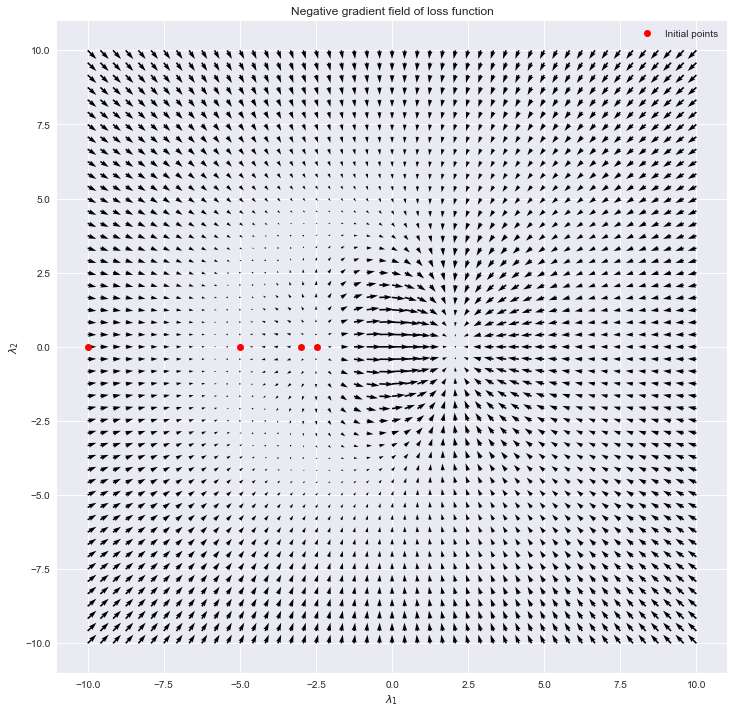

In [48]:
lambda_1 = np.linspace(-10, 10, 49)
lambda_2 = np.linspace(-10, 10, 49)
U_grid = np.empty((lambda_1.shape[0], lambda_2.shape[0]))
V_grid = np.empty((lambda_1.shape[0], lambda_2.shape[0]))
for i, lambda1 in enumerate(lambda_1):
    for j, lambda2 in enumerate(lambda_2):
        derivative = loss_der(np.array([lambda1, lambda2]), data.values)
        U_grid[i, j] = derivative[0]
        V_grid[i, j] = derivative[1]
    
plt.figure(figsize=(12, 12))
plt.quiver(lambda_1, lambda_2, -U_grid.transpose(), -V_grid.transpose())
plt.plot([i[0] for i in lambdas_init], [i[1] for i in lambdas_init], 'ro', label="Initial points")
plt.xlabel(r"$\lambda_1$")
plt.ylabel(r"$\lambda_2$")
plt.title("Negative gradient field of loss function")
plt.legend()

The graph above shows the negative gradient field and thus the "flow lines" of gradient descent (in the limit of inifinitesimally small step size). We see that none of the initial points can be expected to flow to the minimum:

+ $(-2.47865, 0)$ is at a local maximum and has gradient equal to zero.
+ $(-3, 0)$ should flow towards the region of vanishing gradients
+ $(-5, 0)$ here the gradient is close to zero already and not much movement should be expected
+ $(-10, 0)$ for small step sizes we should also expect to land inside the region of vanishing gradients. For this points, however, we managed by tuning the step size appropriately, to jump over the region of vanishing gradients and to converge to the right place.

Note that we can **never leave the x-axis $\lambda_2 = 0$**: the gradient

$$
\frac{\partial \mathcal L}{\partial \lambda_2} = 0.000045 \times 2 \times \lambda_2 x_2 - 0.003926 \lambda_1 x_1 \times 0.1 \times 2 \lambda_2 \exp\left\{0.1\left(\lambda_1^2 + \lambda_2^2\right)\right\} = 0 \:,
$$
if $\lambda_2 = 0$. This holds both for gradient descent and stochastic gradient descent.

We can also look at it from the point of view of the loss function (without gradient) along the axis $\lambda_2=0$. Here, it becomes clear that all points, maybe except the one at the maximum, should be expected to flow to the local minimum near $-5$. 

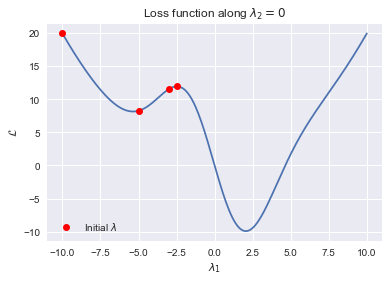

In [58]:
lambda_1 = np.linspace(-10, 10, 200)
lambda_2 = 0
L_grid = np.empty((lambda_1.shape[0]))
for i, lambda1 in enumerate(lambda_1):
    L_grid[i] = L(data.values, np.array([lambda1, lambda_2]))
    
plt.plot(lambda_1, L_grid)
plt.xlabel(r"$\lambda_1$")
plt.ylabel(r"$\mathcal{L}$")
plt.title(r"Loss function along $\lambda_2=0$")
plt.plot([i[0] for i in lambdas_init], [L(data.values, np.array([i[0], 0])) for i in lambdas_init], 'ro',
        label=r'Initial $\lambda$')
plt.legend()

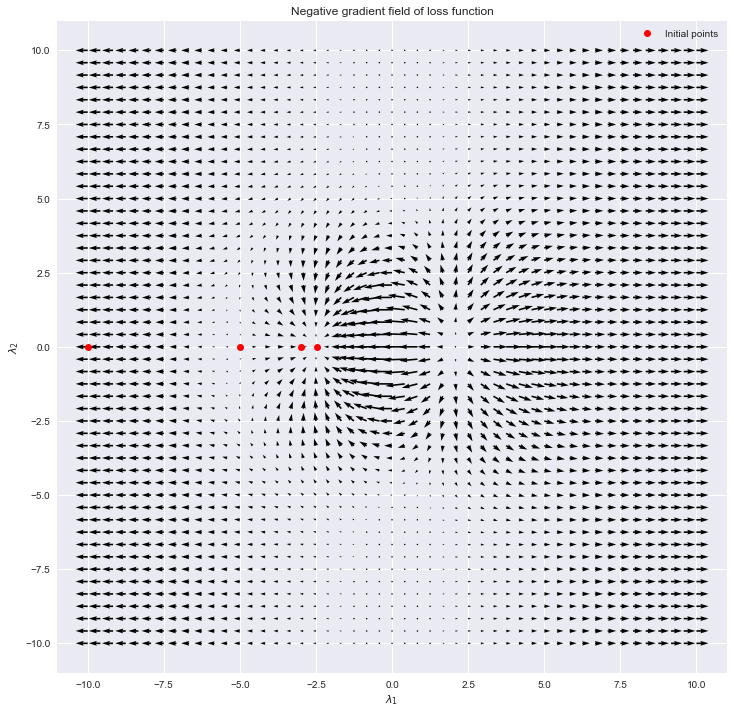

In [66]:
foo = data.loc[lambda x: x.X_1 > 0]

lambda_1 = np.linspace(-10, 10, 49)
lambda_2 = np.linspace(-10, 10, 49)
U_grid = np.empty((lambda_1.shape[0], lambda_2.shape[0]))
V_grid = np.empty((lambda_1.shape[0], lambda_2.shape[0]))
for i, lambda1 in enumerate(lambda_1):
    for j, lambda2 in enumerate(lambda_2):
        derivative = loss_der(np.array([lambda1, lambda2]), foo.values)
        U_grid[i, j] = derivative[0]
        V_grid[i, j] = derivative[1]
    
plt.figure(figsize=(12, 12))
plt.quiver(lambda_1, lambda_2, -U_grid.transpose(), -V_grid.transpose())
plt.plot([i[0] for i in lambdas_init], [i[1] for i in lambdas_init], 'ro', label="Initial points")
plt.xlabel(r"$\lambda_1$")
plt.ylabel(r"$\lambda_2$")
plt.title("Negative gradient field of loss function")
plt.legend()

<div class="answer-separator">
------------------------
</div>